# Introdução

## Desafio 1 - Sprint 02: Projeto de Análise de Dados 

Esse notebook tem como objetivo fazer uma análise aprofundada dos datasets fornecidos pela Compass. Para fazer essa análise, irei utilizar o aprendizado adquirido nos cursos de Python, Pandas, SQL e Estatística.

Ainda nesse notebook serão apresentados:
 - Estatística descritiva do dataset.
 - Gráficos que respondam as perguntas do desafio visualmente.

# Importação dos dados e bibliotecas

In [39]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import datetime

In [2]:
# Importando as bibliotecas de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importando biblioteca para possível uso de SQL
from pandasql import sqldf

In [26]:
# Importando datasets
orders = pd.read_csv('../datasets/olist_orders_dataset.csv', sep=',', encoding='utf-8')
order_items = pd.read_csv('../datasets/olist_order_items_dataset.csv', sep=',', encoding='utf-8')
products = pd.read_csv('../datasets/olist_products_dataset.csv', sep=',', encoding='utf-8')

In [114]:
# Importanto dataset
sellers = pd.read_csv('../datasets/olist_sellers_dataset.csv', sep=',', encoding='utf-8')

In [255]:
# Importando dataset
reviews = pd.read_csv('../datasets/olist_order_reviews_dataset.csv', sep=',', encoding='utf-8')

# Análise Exploratória dos Dados

### Visualização dos Dados

In [8]:
# Visualização dos dados
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
orders.shape

(99441, 8)

In [14]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [9]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
order_items.shape

(112650, 7)

In [15]:
order_items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [27]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [28]:
products.shape

(32951, 9)

In [29]:
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [115]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [116]:
sellers.shape

(3095, 4)

In [117]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [256]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [257]:
reviews.shape

(99224, 7)

In [258]:
reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

### Verificando Dados Faltantes e Duplicados

In [17]:
# Verificando dados nulos nos possíveis atributos que serão usados para juntar as tabelas
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

O dataset de Orders possui alguns valores faltantes, porém como não irei trabalhar com essas colunas, optei por não fazer o tratamento desses dados.

In [19]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [30]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Nesse caso do dataset de Products, é possível ver que o atributo `product_category_name` possui 610 valores nulos. Esse atributo vai ser objeto de estudo dado que a primeira análise/questão do desafio é identificar as categorias com maior e menor receita. Logo, esse atributo deve ser tratado.

In [61]:
# Verificando ocorrência de duplicatas
orders.duplicated().sum()

np.int64(0)

In [62]:
products.duplicated().sum()

np.int64(0)

In [63]:
order_items.duplicated().sum()

np.int64(0)

In [118]:
# Verificando dados nulos ou duplicados nas possíveis colunas que serão necessárias para análise dos melhores e piores sellers
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [119]:
sellers.duplicated().sum()

np.int64(0)

In [259]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Existem muitos valores nulos nas colunas de título e de comentários, porém como eu irei trabalhar apenas com o score, optei por não tratar esses dados. Uma vez que se o customer deu um bom score e não comentou nada, entendo como quem gostou do produto e vice-versa.

In [260]:
reviews.duplicated().sum()

np.int64(0)

### Estatística Descritiva Inicial (Geral)

In [21]:
# Verificando os atributos estatísticos descritivos gerais de cada dataset
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Por ter a maioria dos atributos definidos com o tipo Object, a tabela Orders tem alguns dados da estatística descritiva que não fazem muito sentido. O mesmo acontece em Products.

In [22]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Os dados desse dataframe em questão poderão ser fundamentais para análise de outliers e distribuições anormais, dependendo da análise.
 - mean = Média
 - std = Desvio Padrão
 - Quartis:
   - 25% = Q1
   - 50% = Q2 (ou Mediana)
   - 75% = Q3

Ainda sobre esses dados, cheguei a criar o gráfico de boxsplot de preço, mas como existem produtos que são mais caros e outros mais baratos dada uma série de fatores da composição desse produto, seria incoerente "tratar" esses dados para que ficassem abaixo (limite superior) ou acima (limite inferior) dos valores definidos nos limites. O mesmo vale para o de frete.

In [31]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [123]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [261]:
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


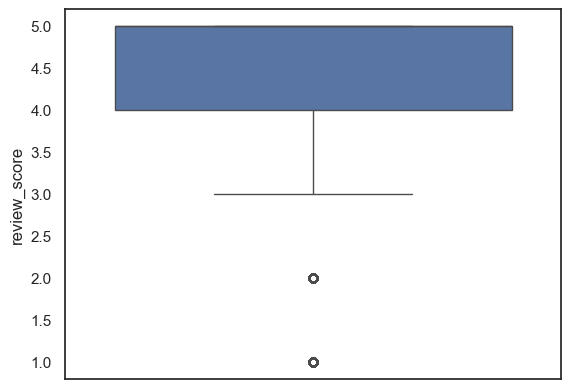

In [263]:
reviews_graphic = sns.boxplot(y='review_score', data=reviews);

Percebe-se que a maioria das reviews dessa empresa são boas, uma vez que a média é de 4.0 e limite inferior está ali pelo score 3. Alguns outliers são notados, reviews com score <= 2

# Limpeza/Tratamento dos Dados

### Dropando valores faltantes do dataset Products

Como dito anteriormente, a coluna `product_category_name` possui 610 valores nulos, dado que essa coluna vai ser trabalhada para a análise de categorias com maior e menor receita, tomei a decisão de dropar esses valores nulos. Pensei em outras alternativas de preencher esses dados, como por exemplo, tentar identificar qual é a categoria pela descrição, porém na tabela temos apenas o tamanho da descrição. Dado isso, preferi que os valores fossem dropados mesmo.

In [33]:
# Dropando valores faltantes da coluna de product_category_name
products = products.dropna(subset=['product_category_name'])

In [34]:
# Visualizando os valores nulos pós limpeza dos dados
products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [35]:
# Como já era de se esperar, a quantidade de produtos diminuiu
products.shape

(32341, 9)

### Modificando tipo das colunas

Como eu precisarei encontrar um intervalo de 12 meses, precisarei trabalhar com datas. Anteriormente ao dar um orders.dtypes, notei que todos os dados são do tipo object, então decidi que uma forma de encontrar esse intervalo de forma mais rápida é modificando o tipo dessa coluna para datetime. O mesmo vale para outras operações com datas.

In [41]:
# Modificando tipo
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

In [42]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                        object
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date            object
dtype: object

In [44]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Definindo intervalo de 12 meses

Como foi pedido na descrição do desafio, deve-se considerar os últimos 12 meses. Para encontrar esse intervalo decidi procurar inicialmente a data da última compra do dataset de orders.

In [45]:
# Encontrando a última compra
last_date = orders["order_purchase_timestamp"].max()
last_date


Timestamp('2018-10-17 17:30:18')

In [48]:
# Encontrando a data inicial
first_date = last_date - datetime.timedelta(days=365)
first_date

Timestamp('2017-10-17 17:30:18')

In [51]:
# Filtrando os dados, dado o intervalo de 12 meses
last_12_months = orders.loc[(orders["order_purchase_timestamp"] >= first_date) & (orders["order_purchase_timestamp"] <= last_date)]


In [54]:
# Visualiando nova tabela com as compras dos últimos 12 meses
last_12_months.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00
13,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08 00:00:00
14,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00
16,403b97836b0c04a622354cf531062e5f,738b086814c6fcc74b8cc583f8516ee3,delivered,2018-01-02 19:00:43,2018-01-02 19:09:04,2018-01-03 18:19:09,2018-01-20 01:38:59,2018-02-06 00:00:00
17,116f0b09343b49556bbad5f35bee0cdf,3187789bec990987628d7a9beb4dd6ac,delivered,2017-12-26 23:41:31,2017-12-26 23:50:22,2017-12-28 18:33:05,2018-01-08 22:36:36,2018-01-29 00:00:00


In [55]:
last_12_months.shape

(69345, 8)

# Análise (resposta) dos dados dos datasets seguindo as perguntas do desafio

Para o desafio foram definidas 9 perguntas (tópicos) a serem respondidos em relação aos datasets. Sendo elas:

##  Quais são as categorias com maior e menor receita?

### Junção dos dataframes

In [64]:
# Usando uma nova varíavel para manipular os pedidos dos últimos 12 meses apenas pelo order_id
treated_orders = last_12_months.loc[:, ["order_id"]]

In [65]:
treated_orders

,order_id
1,53cdb2fc8bc7dce0b6741e2150273451
2,47770eb9100c2d0c44946d9cf07ec65d
3,949d5b44dbf5de918fe9c16f97b45f8a
4,ad21c59c0840e6cb83a9ceb5573f8159
12,82566a660a982b15fb86e904c8d32918
...,...
99431,b0f4af5c1b06e24fef510703bfe9f0a6
99432,cfa78b997e329a5295b4ee6972c02979
99437,63943bddc261676b46f01ca7ac2f7bd8
99439,11c177c8e97725db2631073c19f07b62


Nesse caso, para obter os valores pedidos no tópico acima, será necessário fazer a junção do dataframe `treated_orders` com o dataset `order_items` e posteriormente com `products`.

In [66]:
# Juntando os dataframes através do order_id
filtered_items = order_items.loc[order_items["order_id"].isin(treated_orders["order_id"])]

Nesse caso, ao invés de fazer um merge, preferi usar o `loc` para pegar apenas os itens de pedido relacionados aos id's do dataframe `treated_orders`

In [71]:
filtered_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65


In [72]:
# Fazendo a junção dos dataframes de filtered_items com products pelo product_id
filtered_items_by_categories = products.loc[:, ["product_id", "product_category_name"]].merge(
    filtered_items, on="product_id", how="inner"
)

Vale ressaltar que inicialmente pensei em fazer a junção utilizando SQL com a biblioteca `pandasql` como recomendado em uma reunião técnica pelo Vinicius, porém tive dificuldades e acabei fazendo com o pandas por receio de acabar bagunçando os dados/análise.

In [73]:
filtered_items_by_categories.head()

,product_id,product_category_name,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,bebes,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29


### Calculando receita

In [74]:
# Calculando a receita por categoria
revenue_category = filtered_items_by_categories.loc[:, ["product_category_name", "price"]] \
    .groupby("product_category_name")["price"].sum() \
    .sort_values()

Nesse contexto, foram selecionadas todas as linhas e as colunas necessárias para fazer a contagem da receita, sendo `product_category_name` e `price`. O agrupamento foi feito, como pedido na descrição do desafio, pela coluna de `product_category_name`. Nesse caso, todos os produtos de uma mesma categoria foram agrupados formando uma lista, com isso a última coisa a ser feita era somar pelo preço do produto garantindo assim a receita.

In [75]:
revenue_category

product_category_name
fashion_roupa_infanto_juvenil       169.97
casa_conforto_2                     241.39
cds_dvds_musicais                   370.00
fashion_esporte                     489.30
fashion_roupa_feminina              696.54
                                   ...    
informatica_acessorios           636378.99
esporte_lazer                    679275.58
cama_mesa_banho                  700764.44
relogios_presentes               908035.20
beleza_saude                     931154.84
Name: price, Length: 72, dtype: float64

In [78]:
# Buscando pela categoria de menor receita
min_revenue_category = revenue_category.index[0] #nome
min_revenue = revenue_category.iloc[0] # valor
min_revenue_category, min_revenue

('fashion_roupa_infanto_juvenil', np.float64(169.97))

In [79]:
# Buscando pela categoria de maior receita
max_revenue_category = revenue_category.index[-1] #nome
max_revenue = revenue_category.iloc[-1] # valor
max_revenue_category, max_revenue

('beleza_saude', np.float64(931154.84))

In [80]:
# Convertendo para dataframe
revenue_category_df = revenue_category.reset_index()
revenue_category_df.columns = ["Category", "Revenue"]

In [82]:
revenue_category_df

,Category,Revenue
0,fashion_roupa_infanto_juvenil,169.97
1,casa_conforto_2,241.39
2,cds_dvds_musicais,370.00
3,fashion_esporte,489.30
4,fashion_roupa_feminina,696.54
...,...,...
67,informatica_acessorios,636378.99
68,esporte_lazer,679275.58
69,cama_mesa_banho,700764.44
70,relogios_presentes,908035.20


### Gráfico

Representação gráfica e visual das categorias de maior até a menor receita.

In [104]:
sns.set_theme(style="whitegrid")

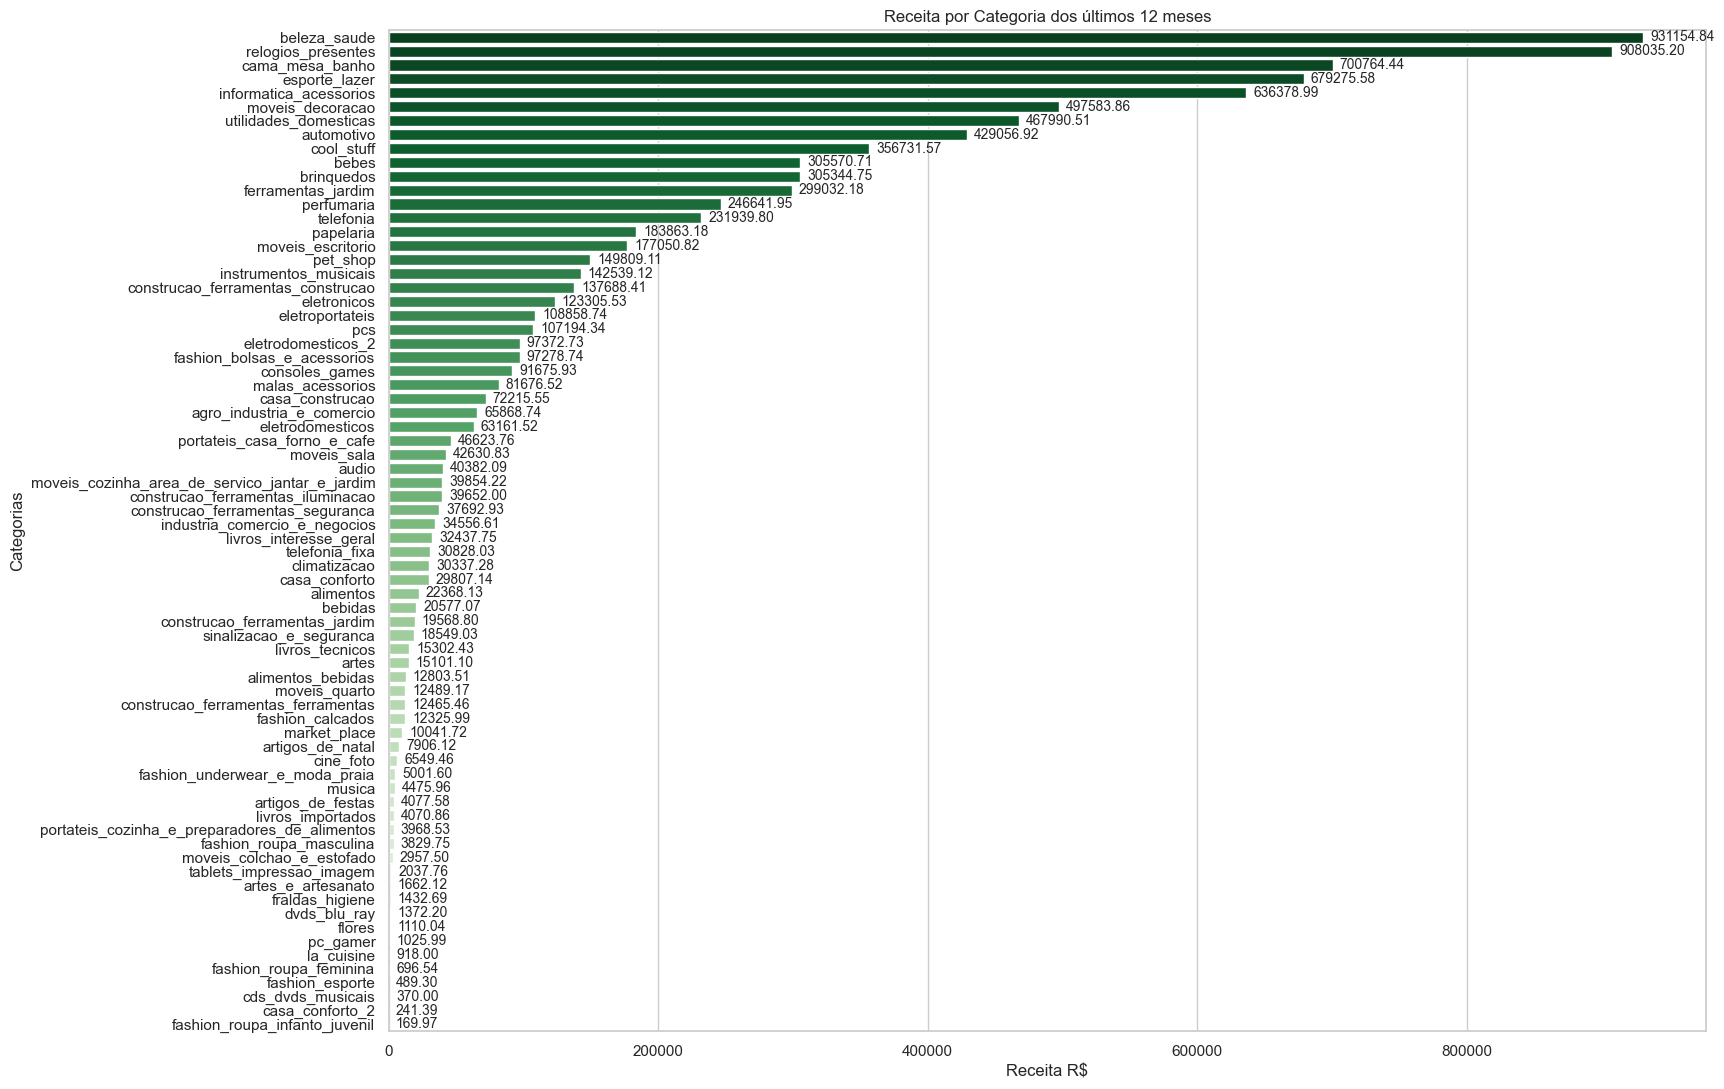

In [113]:
plt.figure(figsize=(17, 13))
category_graphic = sns.barplot(data=revenue_category_df, x="Revenue", y="Category", palette="Greens", hue='Category',
            order=revenue_category_df.sort_values("Revenue", ascending=False)["Category"])
category_graphic.set_title("Receita por Categoria dos últimos 12 meses")
category_graphic.set_xlabel("Receita R$")
category_graphic.set_ylabel("Categorias")

# Inserindo os valores nas barras
for container in category_graphic.containers:  
    category_graphic.bar_label(container, fmt="%.2f", fontsize=10, padding=5) 

## Top 10 maiores sellers (com maior receita)?


### Junção dos dataframes

Para responder esse tópico será necessário realizar a junção dos dataframes de `sellers` e de `order_items`.

In [147]:
# Junção dos datasets de order_items e seller dado o intervalo de 12 meses
treated_order_items = last_12_months.merge(order_items, on="order_id").merge(sellers, on="seller_id")

In [148]:
treated_order_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,31570,belo horizonte,SP
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9,19.22,14840,guariba,SP
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.0,27.20,31842,belo horizonte,MG
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.9,8.72,8752,mogi das cruzes,SP
4,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,1,72a97c271b2e429974398f46b93ae530,094ced053e257ae8cae57205592d6712,2018-06-18 03:13:12,31.9,18.23,14095,ribeirao preto,SP


In [149]:
# Filtrando a receita de cada seller agrupado pelo id do seller e o valor das vendas
sellers_revenue = treated_order_items.groupby("seller_id")["price"].sum()

In [158]:
sellers_revenue

seller_id
0015a82c2db000af6aaaf3ae2ecb0532     895.00
001cca7ae9ae17fb1caed9dfb1094831    8494.80
001e6ad469a905060d959994f1b41e4f     250.00
002100f778ceb8431b7a1020ff7ab48f    1144.20
003554e2dce176b5555353e4f3555ac8     120.00
                                     ...   
ffc470761de7d0232558ba5e786e57b7    1649.01
ffcfefa19b08742c5d315f2791395ee5      69.90
ffdd9f82b9a447f6f8d4b91554cc7dd3    1672.10
ffeee66ac5d5a62fe688b9d26f83f534    1709.87
fffd5413c0700ac820c7069d66d98c89    7298.10
Name: price, Length: 2590, dtype: float64

### Buscando os 10 melhores sellers

Dado que temos o dataframe `sellers_revenue` com a receita de todos os sellers, agora é só ordená-los de forma decrescente e filtrar pelos 10 primeiros.

In [155]:
# Ordenando de forma decrescente
best_sellers = sellers_revenue.sort_values(ascending=False).head(10).reset_index()
best_sellers


,seller_id,price
0,4869f7a5dfa277a7dca6462dcf3b52b2,183399.80
1,fa1c13f2614d7b5c4749cbc52fecda94,138792.84
2,955fee9216a65b617aa5c0531780ce60,129499.57
3,1025f0e2d44d7041d6cf58b6550e0bfa,124746.35
4,da8622b14eb17ae2831f4ac5b9dab84a,119900.27
5,7c67e1448b00f6e969d365cea6b010ab,118935.34
6,7d13fca15225358621be4086e1eb0964,113628.97
7,4a3ca9315b744ce9f8e9374361493884,109292.63
8,53243585a1d6dc2643021fd1853d8905,102567.53
9,6560211a19b47992c3666cc44a7e94c0,90035.90


### Gráfico

Representação gráfica do top 10 de maiores sellers.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '4869f7a5dfa277a7dca6462dcf3b52b2'),
  Text(1, 0, 'fa1c13f2614d7b5c4749cbc52fecda94'),
  Text(2, 0, '955fee9216a65b617aa5c0531780ce60'),
  Text(3, 0, '1025f0e2d44d7041d6cf58b6550e0bfa'),
  Text(4, 0, 'da8622b14eb17ae2831f4ac5b9dab84a'),
  Text(5, 0, '7c67e1448b00f6e969d365cea6b010ab'),
  Text(6, 0, '7d13fca15225358621be4086e1eb0964'),
  Text(7, 0, '4a3ca9315b744ce9f8e9374361493884'),
  Text(8, 0, '53243585a1d6dc2643021fd1853d8905'),
  Text(9, 0, '6560211a19b47992c3666cc44a7e94c0')])

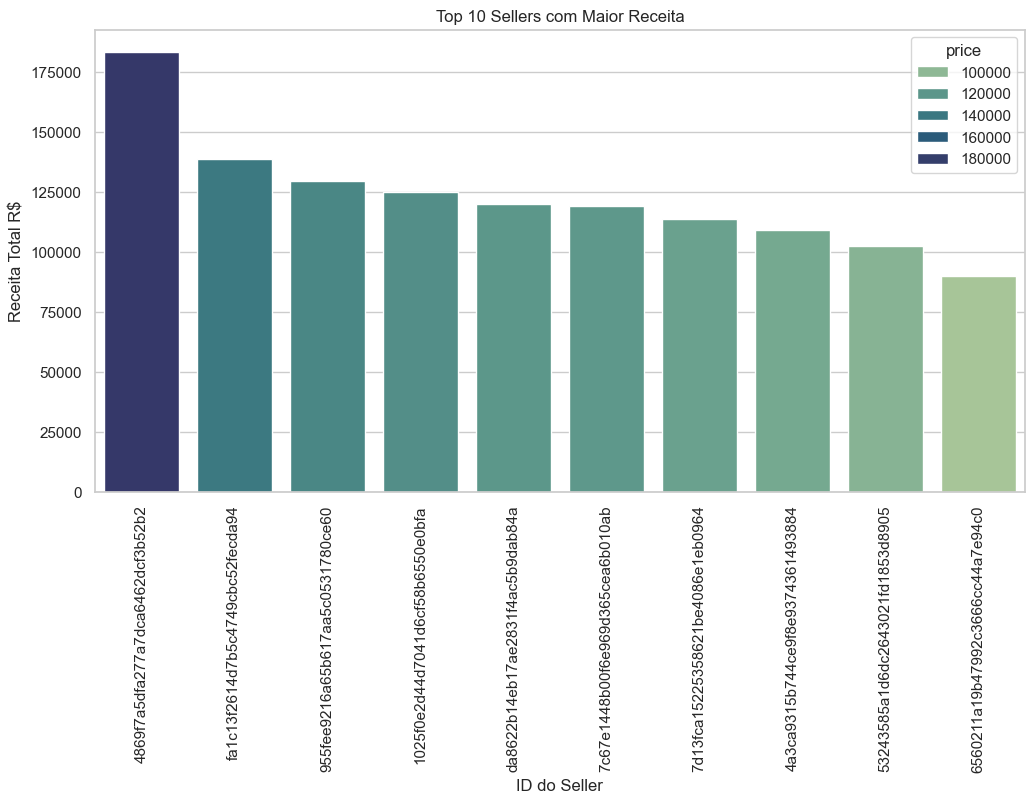

In [156]:
# Criando o gráfico
plt.figure(figsize=(12, 6))

best_sellers_graphic = sns.barplot(data=best_sellers, x='seller_id', y='price', palette='crest', hue='price')

best_sellers_graphic.set_title("Top 10 Sellers com Maior Receita")
best_sellers_graphic.set_ylabel("Receita Total R$")
best_sellers_graphic.set_xlabel("ID do Seller")

plt.xticks(rotation=90)


## Top 10 piores sellers (com menor receita)?

Como já foi realizada a junção dos dataframes de `sellers` e `order_items` ao buscar os 10 maiores sellers, para responder esse tópico irei apenas inverter e mostrar pela ordem crescente.

### Buscando os 10 piores sellers

In [157]:
worst_sellers = sellers_revenue.sort_values(ascending=True).head(10).reset_index()
worst_sellers

,seller_id,price
0,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
1,08061dc0fc165ed41288cc7acde738ee,7.90
2,4965a7002cca77301c82d3f91b82e1a9,8.49
3,c1d1ebb4745cc43cb6f05e9c8a705c9a,8.50
4,ad8b531ae67582f096925cff5630d0d1,9.40
5,c18309219e789960add0b2255ca4b091,9.90
6,9996ae921c50e8dff411ac69c0b4bb8b,9.90
7,95cca791657aabeff15a07eb152d7841,9.99
8,344223b2a90784f64136a8a5da012e7f,10.90
9,84deb808079d1be601c209c1e771b1cc,11.90


### Gráfico

Representação gráfica do top 10 piores sellers (com menor receita).

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1fa2d3def6adfa70e58c276bb64fe5bb'),
  Text(1, 0, '08061dc0fc165ed41288cc7acde738ee'),
  Text(2, 0, '4965a7002cca77301c82d3f91b82e1a9'),
  Text(3, 0, 'c1d1ebb4745cc43cb6f05e9c8a705c9a'),
  Text(4, 0, 'ad8b531ae67582f096925cff5630d0d1'),
  Text(5, 0, 'c18309219e789960add0b2255ca4b091'),
  Text(6, 0, '9996ae921c50e8dff411ac69c0b4bb8b'),
  Text(7, 0, '95cca791657aabeff15a07eb152d7841'),
  Text(8, 0, '344223b2a90784f64136a8a5da012e7f'),
  Text(9, 0, '84deb808079d1be601c209c1e771b1cc')])

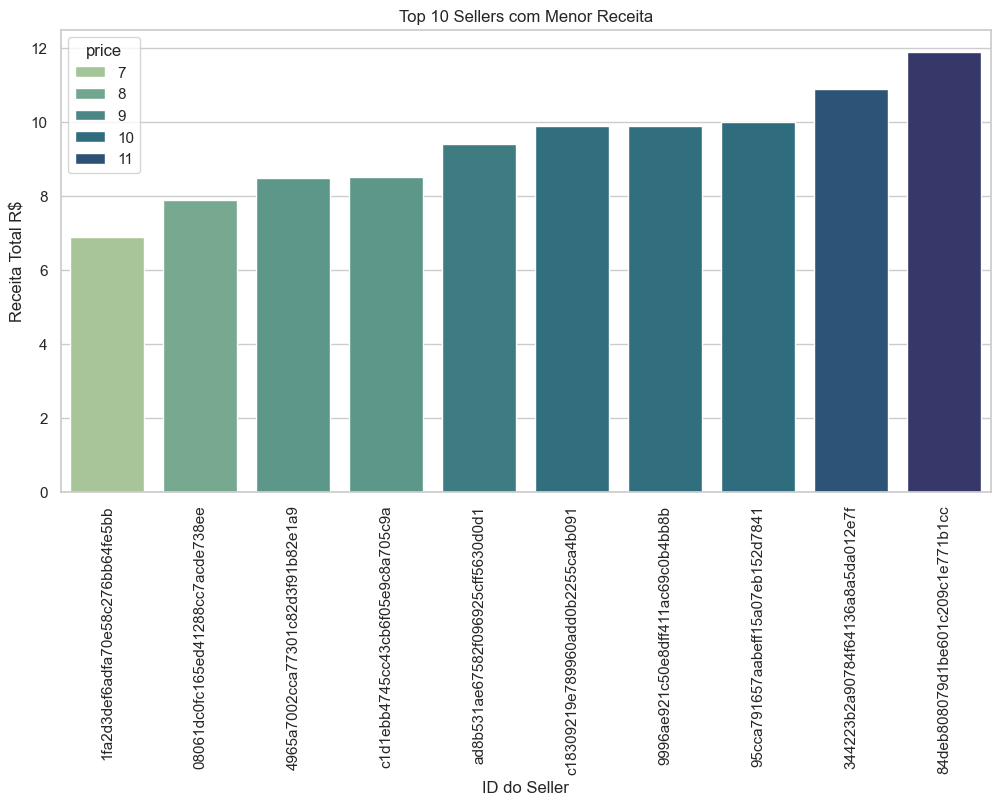

In [159]:
# Criando o gráfico
plt.figure(figsize=(12, 6))

worst_sellers_graphic = sns.barplot(data=worst_sellers, x='seller_id', y='price', palette='crest', hue='price')

worst_sellers_graphic.set_title("Top 10 Sellers com Menor Receita")
worst_sellers_graphic.set_ylabel("Receita Total R$")
worst_sellers_graphic.set_xlabel("ID do Seller")

plt.xticks(rotation=90)


## Existem sellers que vendem o mesmo produto? Se sim, quais são? Qual é a variação de preço praticado entre os Sellers?

Primeiro passo nesse caso é identificar quais produtos possuem mais de um seller associado a ele.

### Verificando quantos sellers vendem o mesmo produto

Utilizando o dataframe `treated_order_items` criado para responder a pergunta dos top 10 sellers, para gerar um novo dataframe com as colunas que "importam" para esse tópico em específico.

In [161]:
seller_product = treated_order_items.loc[:, ['product_id', 'seller_id', 'price']]
seller_product.head()

,product_id,seller_id,price
0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7
1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.9
2,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.0
3,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.9
4,72a97c271b2e429974398f46b93ae530,094ced053e257ae8cae57205592d6712,31.9


In [163]:
# Contando os valores de produtos únicos (vendidos por apenas um seller)
more_than_one_seller = seller_product.groupby("product_id")["seller_id"].nunique()
more_than_one_seller

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
00088930e925c41fd95ebfe695fd2655    1
0009406fd7479715e4bef61dd91f2462    1
000b8f95fcb9e0096488278317764d19    1
000d9be29b5207b54e86aa1b1ac54872    1
                                   ..
fff1059cd247279f3726b7696c66e44e    1
fff515ea94dbf35d54d256b3e39f0fea    1
fff81cc3158d2725c0655ab9ba0f712c    1
fffdb2d0ec8d6a61f0a0a0db3f25b441    1
fffe9eeff12fcbd74a2f2b007dde0c58    1
Name: seller_id, Length: 24745, dtype: int64

In [165]:
# Contando quantos são vendidos por mais de um seller
more_than_one_seller = more_than_one_seller[more_than_one_seller > 1]
more_than_one_seller

product_id
00f8c37377b038c9c791128d2f928111    2
00fefaf41156bb4b0d850fb27da97897    2
013e6676e0e3529e5909ff54370daddf    2
0168e1b28d8e55a515928cf656eff0a4    2
01a2ad2b54cd734f78cb817da7752d8b    2
                                   ..
ffa7e0cbe11656d11a117b534bb1db27    2
ffaf0af7eebb57c7f262b51ebb05dfd6    3
ffb97eb64c6fe1baada2410288c04457    2
ffc9caf33e2d1e9f44e3e06da19085f7    2
ffd2365fb8224dc66883df9351d65deb    3
Name: seller_id, Length: 847, dtype: int64

In [166]:
# Criando dataframe apenas com produtos que possuem mais de um seller
multiple_sellers_product = seller_product[seller_product["product_id"].isin(more_than_one_seller.index)]
multiple_sellers_product

,product_id,seller_id,price
0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70
1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90
6,72d3bf1d3a790f8874096fcf860e3eff,0bae85eb84b9fb3bd773911e89288d54,38.25
20,ba74c6b75d2ad7503175809688d5a03c,7d13fca15225358621be4086e1eb0964,178.99
28,c7df652246ed7b3300aaf46960c141e4,a5cba26a62b8b4d0145b68b841e62e7f,445.00
...,...,...,...
78812,a71f57831a39fd421d4dd2cbfbbcf9f7,985c92cc412091f8529c12d7f23d3fef,84.30
78822,ea4f4b5a820fea007c6c8d7ef9a790bc,897060da8b9a21f655304d50fd935913,45.73
78830,7b35ccd93a2184646c03b70326626923,4d6d651bd7684af3fffabd5f08d12e5a,113.00
78835,0a57f7d2c983bcf8188589a5fea4a8da,4869f7a5dfa277a7dca6462dcf3b52b2,96.00


### Calculando variação de preço

Para calcular a variação de preços, irei utilizar o dataframe `multiple_sellers_product` criado e funções lambda. Dessa forma, pegarei o valor máximo e o mínimo que um produto foi vendido.

In [168]:
# Calculando variação de cada produto
variation = multiple_sellers_product.groupby("product_id")["price"].agg(min_price="min", max_price="max", 
            variation=lambda x: x.max() - x.min()).reset_index()
variation

,product_id,min_price,max_price,variation
0,00f8c37377b038c9c791128d2f928111,16.90,23.90,7.00
1,00fefaf41156bb4b0d850fb27da97897,13.49,15.49,2.00
2,013e6676e0e3529e5909ff54370daddf,199.90,299.90,100.00
3,0168e1b28d8e55a515928cf656eff0a4,39.50,39.90,0.40
4,01a2ad2b54cd734f78cb817da7752d8b,55.00,58.00,3.00
...,...,...,...,...
842,ffa7e0cbe11656d11a117b534bb1db27,14.49,18.49,4.00
843,ffaf0af7eebb57c7f262b51ebb05dfd6,92.00,94.00,2.00
844,ffb97eb64c6fe1baada2410288c04457,189.90,196.50,6.60
845,ffc9caf33e2d1e9f44e3e06da19085f7,199.89,224.00,24.11


In [170]:
# Contagem de quantos sellers vendeu determinado produto pelo id do produto e o id do seller
seller_count = multiple_sellers_product.groupby("product_id")["seller_id"].nunique().reset_index()
seller_count


,product_id,seller_id
0,00f8c37377b038c9c791128d2f928111,2
1,00fefaf41156bb4b0d850fb27da97897,2
2,013e6676e0e3529e5909ff54370daddf,2
3,0168e1b28d8e55a515928cf656eff0a4,2
4,01a2ad2b54cd734f78cb817da7752d8b,2
...,...,...
842,ffa7e0cbe11656d11a117b534bb1db27,2
843,ffaf0af7eebb57c7f262b51ebb05dfd6,3
844,ffb97eb64c6fe1baada2410288c04457,2
845,ffc9caf33e2d1e9f44e3e06da19085f7,2


In [171]:
# Renomeando o nome da coluna seller_id para seller_count
seller_count.columns = ["product_id", "seller_count"]
seller_count

,product_id,seller_count
0,00f8c37377b038c9c791128d2f928111,2
1,00fefaf41156bb4b0d850fb27da97897,2
2,013e6676e0e3529e5909ff54370daddf,2
3,0168e1b28d8e55a515928cf656eff0a4,2
4,01a2ad2b54cd734f78cb817da7752d8b,2
...,...,...
842,ffa7e0cbe11656d11a117b534bb1db27,2
843,ffaf0af7eebb57c7f262b51ebb05dfd6,3
844,ffb97eb64c6fe1baada2410288c04457,2
845,ffc9caf33e2d1e9f44e3e06da19085f7,2


In [173]:
# Criando um dataframe para unir todos os dados acima através de junção
variation = variation.merge(seller_count, on="product_id")
variation


,product_id,min_price,max_price,variation,seller_count_x,seller_count_y
0,00f8c37377b038c9c791128d2f928111,16.90,23.90,7.00,2,2
1,00fefaf41156bb4b0d850fb27da97897,13.49,15.49,2.00,2,2
2,013e6676e0e3529e5909ff54370daddf,199.90,299.90,100.00,2,2
3,0168e1b28d8e55a515928cf656eff0a4,39.50,39.90,0.40,2,2
4,01a2ad2b54cd734f78cb817da7752d8b,55.00,58.00,3.00,2,2
...,...,...,...,...,...,...
842,ffa7e0cbe11656d11a117b534bb1db27,14.49,18.49,4.00,2,2
843,ffaf0af7eebb57c7f262b51ebb05dfd6,92.00,94.00,2.00,3,3
844,ffb97eb64c6fe1baada2410288c04457,189.90,196.50,6.60,2,2
845,ffc9caf33e2d1e9f44e3e06da19085f7,199.89,224.00,24.11,2,2


In [ ]:
# Acredito que por conta da junção o pandas duplicou a coluna de contagem, nesse caso irei dropá-la
variation = variation.drop(columns=["seller_count_y"])

In [183]:
variation = variation.rename(columns={"seller_count_x": "seller_count"})

In [184]:
variation

,product_id,min_price,max_price,variation,seller_count
0,00f8c37377b038c9c791128d2f928111,16.90,23.90,7.00,2
1,00fefaf41156bb4b0d850fb27da97897,13.49,15.49,2.00,2
2,013e6676e0e3529e5909ff54370daddf,199.90,299.90,100.00,2
3,0168e1b28d8e55a515928cf656eff0a4,39.50,39.90,0.40,2
4,01a2ad2b54cd734f78cb817da7752d8b,55.00,58.00,3.00,2
...,...,...,...,...,...
842,ffa7e0cbe11656d11a117b534bb1db27,14.49,18.49,4.00,2
843,ffaf0af7eebb57c7f262b51ebb05dfd6,92.00,94.00,2.00,3
844,ffb97eb64c6fe1baada2410288c04457,189.90,196.50,6.60,2
845,ffc9caf33e2d1e9f44e3e06da19085f7,199.89,224.00,24.11,2


### Listando os sellers que vendem o mesmo produto

Criando um novo dataframe com o produto, seller e o preço do produto (todos os preços que o produto já foi vendido), usando novamente funções lambda, nesse caso para determinar um único id para o seller e não aparecer duplicado (como se fosse o distinct do SQL).

In [185]:
sellers_per_product = multiple_sellers_product.groupby("product_id").agg(sellers=("seller_id", lambda x: list(x.unique())),
    prices=("price", lambda x: list(x))).reset_index()

In [186]:
sellers_per_product

,product_id,sellers,prices
0,00f8c37377b038c9c791128d2f928111,"[dbd66278cbfe1aa1000f90a217ca4695, 5acd070dd3f...","[23.9, 16.9]"
1,00fefaf41156bb4b0d850fb27da97897,"[9b013e03b2ab786505a1d3b5c0756754, e9779976487...","[13.49, 15.49, 13.49, 13.99, 13.49]"
2,013e6676e0e3529e5909ff54370daddf,"[1c68394e931a64f90ea236c5ea590300, f457c46070d...","[299.9, 299.9, 299.9, 299.9, 299.9, 199.9]"
3,0168e1b28d8e55a515928cf656eff0a4,"[39d54ff918774174706fb065d7f9dc07, 6338ea67c41...","[39.5, 39.9]"
4,01a2ad2b54cd734f78cb817da7752d8b,"[42b6488f5b8246d9141712abd4b1b693, f4a04f7be45...","[58.0, 55.0]"
...,...,...,...
842,ffa7e0cbe11656d11a117b534bb1db27,"[e9779976487b77c6d4ac45f75ec7afe9, 9b013e03b2a...","[14.49, 14.49, 18.49, 18.49, 14.49, 14.49, 17...."
843,ffaf0af7eebb57c7f262b51ebb05dfd6,"[2a61c271b1ac763450d846849783e922, 85ecf03781d...","[93.99, 93.99, 93.99, 93.99, 93.99, 93.99, 93...."
844,ffb97eb64c6fe1baada2410288c04457,"[fe2032dab1a61af8794248c8196565c9, 26d8a1c7c75...","[196.5, 189.9, 189.9, 189.99, 189.9]"
845,ffc9caf33e2d1e9f44e3e06da19085f7,"[b18dc380845b24038cfc48006478f099, d06d019f72a...","[199.89, 199.89, 224.0, 199.89, 199.89, 199.89..."


Criando o último dataframe para responder a pergunta do tópico em questão, juntanto também a variação dos preços pedida.

In [187]:
product_variation = variation.merge(sellers_per_product, on="product_id")

In [188]:
product_variation

,product_id,min_price,max_price,variation,seller_count,sellers,prices
0,00f8c37377b038c9c791128d2f928111,16.90,23.90,7.00,2,"[dbd66278cbfe1aa1000f90a217ca4695, 5acd070dd3f...","[23.9, 16.9]"
1,00fefaf41156bb4b0d850fb27da97897,13.49,15.49,2.00,2,"[9b013e03b2ab786505a1d3b5c0756754, e9779976487...","[13.49, 15.49, 13.49, 13.99, 13.49]"
2,013e6676e0e3529e5909ff54370daddf,199.90,299.90,100.00,2,"[1c68394e931a64f90ea236c5ea590300, f457c46070d...","[299.9, 299.9, 299.9, 299.9, 299.9, 199.9]"
3,0168e1b28d8e55a515928cf656eff0a4,39.50,39.90,0.40,2,"[39d54ff918774174706fb065d7f9dc07, 6338ea67c41...","[39.5, 39.9]"
4,01a2ad2b54cd734f78cb817da7752d8b,55.00,58.00,3.00,2,"[42b6488f5b8246d9141712abd4b1b693, f4a04f7be45...","[58.0, 55.0]"
...,...,...,...,...,...,...,...
842,ffa7e0cbe11656d11a117b534bb1db27,14.49,18.49,4.00,2,"[e9779976487b77c6d4ac45f75ec7afe9, 9b013e03b2a...","[14.49, 14.49, 18.49, 18.49, 14.49, 14.49, 17...."
843,ffaf0af7eebb57c7f262b51ebb05dfd6,92.00,94.00,2.00,3,"[2a61c271b1ac763450d846849783e922, 85ecf03781d...","[93.99, 93.99, 93.99, 93.99, 93.99, 93.99, 93...."
844,ffb97eb64c6fe1baada2410288c04457,189.90,196.50,6.60,2,"[fe2032dab1a61af8794248c8196565c9, 26d8a1c7c75...","[196.5, 189.9, 189.9, 189.99, 189.9]"
845,ffc9caf33e2d1e9f44e3e06da19085f7,199.89,224.00,24.11,2,"[b18dc380845b24038cfc48006478f099, d06d019f72a...","[199.89, 199.89, 224.0, 199.89, 199.89, 199.89..."


### Gráfico

Para responder a pergunta desse tópico graficamente decidi pegar uma amostra do dataframe, uma vez que o gráfico estava ficando extremamente polúido.

Sobre a primeira parte da pergunta, é possível enxergar no gráfico abaixo que sim, existem sellers que vendem o mesmo produto. Dado isso, ainda sobre não poluir o gráfico (tentei fazer, porém não era um gráfico apresentável devido a sua quantidade de informação), preferi não colocar no gráfico os id's dos sellers que vendem determinado produto, uma vez que existe produto que é vendido até por 7 sellers no dataframe. Dessa forma, a resposta para a pergunta "Quais são?" pode ser respondida a seção 'Listando os sellers que vendem o mesmo produto' com a visualização da última tabela.

In [194]:
np.random.seed(1)

In [210]:
sampled = product_variation.sample(frac=0.05)

Text(0.5, 0, 'Quantidade de Sellers que vendem o mesmo Produto')

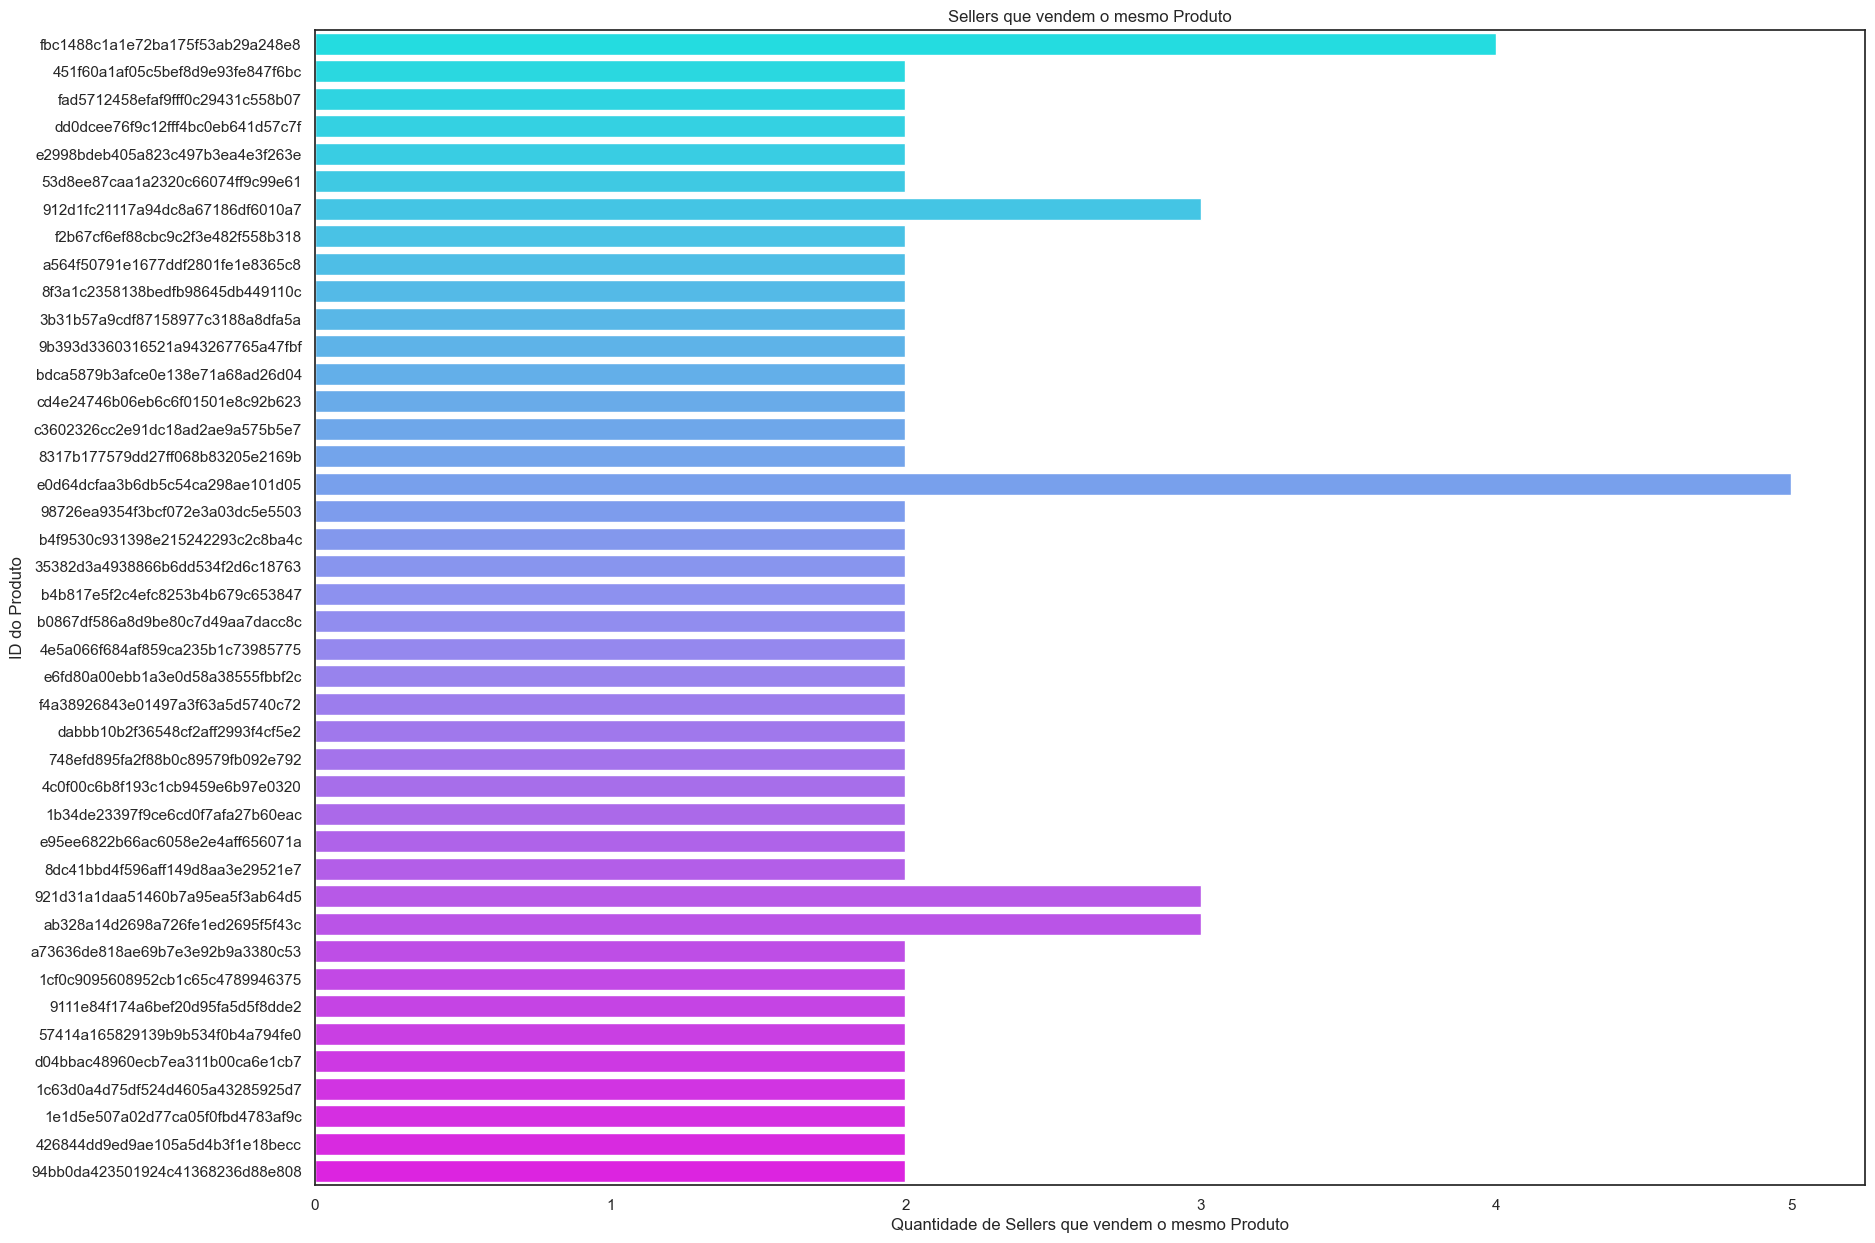

In [211]:
plt.figure(figsize=(20, 15))
multiple_sellers_graphic = sns.barplot(data=sampled, x='seller_count', y='product_id', palette='cool', hue='product_id')
sns.set_theme(style='white')

multiple_sellers_graphic.set_title("Sellers que vendem o mesmo Produto")
multiple_sellers_graphic.set_ylabel("ID do Produto")
multiple_sellers_graphic.set_xlabel("Quantidade de Sellers que vendem o mesmo Produto")


Respondendo a última parte da pergunta, segue abaixo o gráfico que mostra a variação de preço de cada produto.

Text(0.5, 0, 'Variação de Preços')

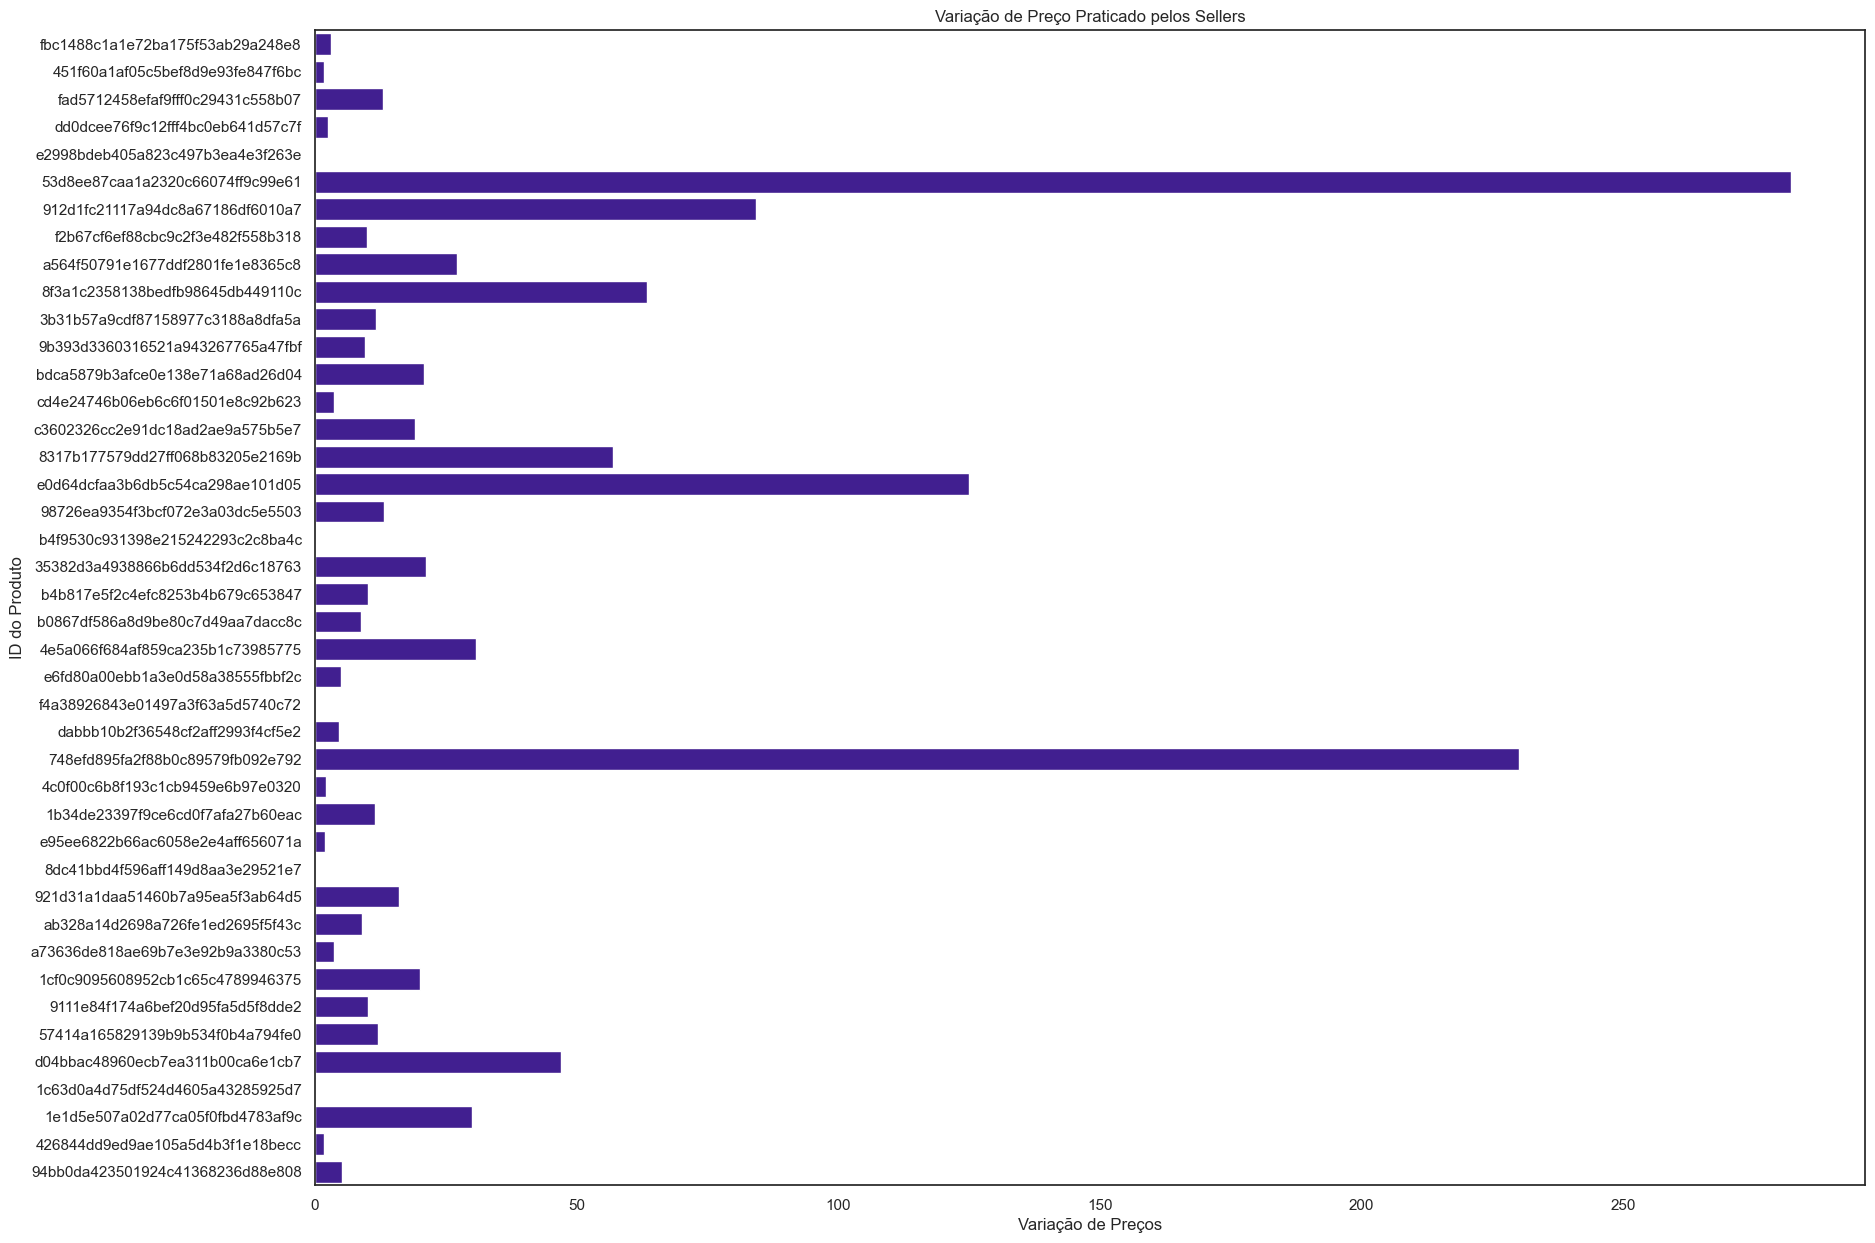

In [222]:
plt.figure(figsize=(20, 15))
variation_graphic = sns.barplot(data=sampled, x='variation', y='product_id', color='#3A0CA3')
sns.set_theme(style='white')

variation_graphic.set_title("Variação de Preço Praticado pelos Sellers")
variation_graphic.set_ylabel("ID do Produto")
variation_graphic.set_xlabel("Variação de Preços")

## Houve inflação no preço dos produtos ao passar do tempo? Se houve, de quanto foi a variação desta inflação em % e em R$?

### Junção dos dataframes

In [226]:
# Juntando os dataframes na qual foi defnido o intervalo de 12 meses
orders_data = pd.merge(treated_order_items, treated_orders, on='order_id')

In [227]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,31570,belo horizonte,SP
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9,19.22,14840,guariba,SP
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.0,27.20,31842,belo horizonte,MG
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.9,8.72,8752,mogi das cruzes,SP
4,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,1,72a97c271b2e429974398f46b93ae530,094ced053e257ae8cae57205592d6712,2018-06-18 03:13:12,31.9,18.23,14095,ribeirao preto,SP


Nesse caso em específico, irei buscar esses valores por mês, então vou criar uma coluna chamada `purchase_month` agrupando os dados pelo mês e irei trabalhar o resto da análise sobre ela.

In [228]:
orders_data['purchase_month'] = orders_data['order_purchase_timestamp'].dt.to_period('M')

In [229]:
orders_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,purchase_month
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,31570,belo horizonte,SP,2018-07
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9,19.22,14840,guariba,SP,2018-08
2,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.0,27.20,31842,belo horizonte,MG,2017-11
3,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.9,8.72,8752,mogi das cruzes,SP,2018-02
4,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,1,72a97c271b2e429974398f46b93ae530,094ced053e257ae8cae57205592d6712,2018-06-18 03:13:12,31.9,18.23,14095,ribeirao preto,SP,2018-06


### Calculando inflação

Incialmente, irei calcular o preço médio dos produtos para depois calcular a variação com o último mês e obter a inflação.

In [240]:
mean_of_price = (orders_data.groupby('purchase_month')['price'].mean().reset_index().rename(columns={'price': 'avg_price'}))

In [241]:
mean_of_price.head()

,purchase_month,avg_price
0,2017-10,120.886128
1,2017-11,116.592195
2,2017-12,117.931860
3,2018-01,115.744440
4,2018-02,110.033721


In [243]:
# Calculando a inflação filtrando o valor médio do primeiro mês e do último
first_month = mean_of_price['avg_price'].iloc[0]
last_month = mean_of_price['avg_price'].iloc[-1]

In [246]:
# Variação absoluta
variation_abs = last_month - first_month
variation_abs

np.float64(24.11387214983712)

In [248]:
# Variação em porcentagem
variation_percent = (variation_abs / first_month) * 100
variation_percent

np.float64(19.94759248118694)

Variação foi de aproximadamente 20% por cento.

In [251]:
mean_of_price.dtypes

purchase_month    period[M]
avg_price           float64
dtype: object

In [252]:
mean_of_price['purchase_month'] = mean_of_price['purchase_month'].astype(str)


In [253]:
mean_of_price.dtypes

purchase_month     object
avg_price         float64
dtype: object

### Gráfico

Representando a variação por mês através do gráfico de linhas.

Text(0.5, 0, 'Mês / Ano')

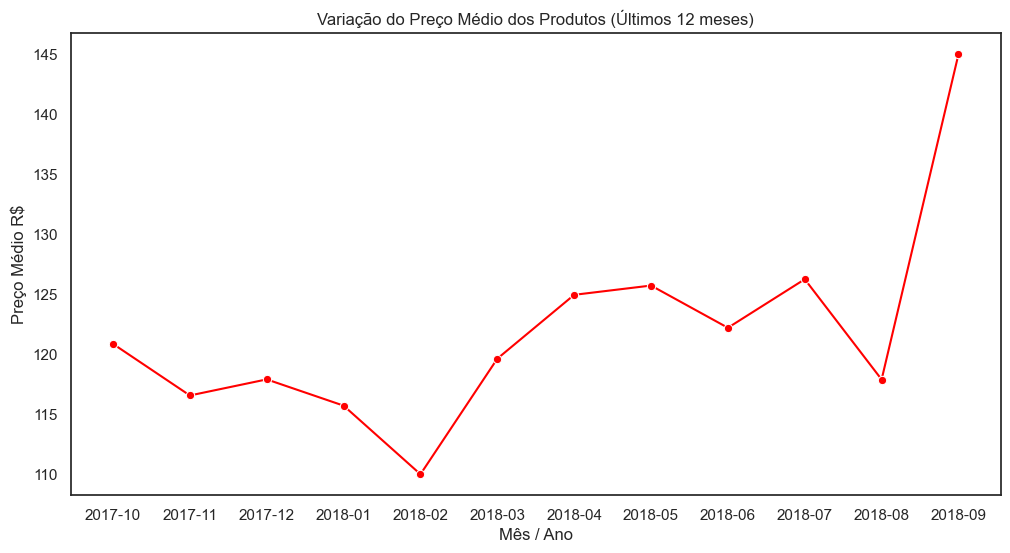

In [254]:
plt.figure(figsize=(12, 6))
variation_percent_graphic = sns.lineplot(data=mean_of_price, x='purchase_month', y='avg_price', marker='o', color='red')

variation_percent_graphic.set_title("Variação do Preço Médio dos Produtos (Últimos 12 meses)")
variation_percent_graphic.set_ylabel("Preço Médio R$")
variation_percent_graphic.set_xlabel("Mês / Ano")

## Top 10 melhores sellers (com mais reviews positivas)?

Para responder a essa pergunta, criei meu critério de:

 - Review boa: review_score >= 4.
 - Review ruim: review_score <= 2.
 - Apenas sellers com pelo menos 5 avaliações (positivas ou negativas) serão considerados.

### Junção dos dataframes

Fazendo a junção dos dataframes de `order_reviews` e o dataframe tratado com o intervalo de 12 meses `treated_order_items`

In [265]:
reviews_data = treated_order_items.merge(reviews, on='order_id', how='inner')

### Calculando as métricas do score

In [266]:
# Como definido, bom score >= 4 e score ruim <= 2. Além disso, estarei contando a quantidade de reviews que o seller teve, se tiver menos de 5 não entrará na análise.
seller_reviews = (reviews_data.groupby('seller_id').agg(total_reviews=('review_score', 'count'), 
        good_reviews=('review_score', lambda x: (x >= 4).sum()),
        bad_reviews=('review_score', lambda x: (x <= 2).sum())).reset_index())

In [267]:
seller_reviews

,seller_id,total_reviews,good_reviews,bad_reviews
0,0015a82c2db000af6aaaf3ae2ecb0532,1,0,1
1,001cca7ae9ae17fb1caed9dfb1094831,77,56,13
2,001e6ad469a905060d959994f1b41e4f,1,0,1
3,002100f778ceb8431b7a1020ff7ab48f,49,35,6
4,003554e2dce176b5555353e4f3555ac8,1,1,0
...,...,...,...,...
2583,ffc470761de7d0232558ba5e786e57b7,30,23,2
2584,ffcfefa19b08742c5d315f2791395ee5,1,0,1
2585,ffdd9f82b9a447f6f8d4b91554cc7dd3,16,12,3
2586,ffeee66ac5d5a62fe688b9d26f83f534,13,11,2


In [273]:
seller_reviews.dtypes

seller_id        object
total_reviews     int64
good_reviews      int64
bad_reviews       int64
dtype: object

In [275]:
# Filtrando os sellers com mais de 5 reviews
more_than_five_reviews = seller_reviews.loc[seller_reviews['total_reviews'] >= 5]


In [285]:
# Encontrando os melhores sellers dado as reviews
best_sellers_by_review = more_than_five_reviews.sort_values(by='good_reviews', ascending=False).head(10)
best_sellers_by_review


,seller_id,total_reviews,good_reviews,bad_reviews
1531,955fee9216a65b617aa5c0531780ce60,1415,1062,212
321,1f50f920176fa81dab994f9023523100,1448,1043,285
1046,6560211a19b47992c3666cc44a7e94c0,1451,1023,270
2218,da8622b14eb17ae2831f4ac5b9dab84a,1221,945,179
169,1025f0e2d44d7041d6cf58b6550e0bfa,1271,881,273
2376,ea8482cd71df3c1969d7b9473ff13abc,1151,832,196
1437,8b321bb669392f5163d04c59e235e066,1014,761,174
2075,cc419e0650a3c5ba77189a1882b7556a,995,733,162
735,4869f7a5dfa277a7dca6462dcf3b52b2,930,714,138
756,4a3ca9315b744ce9f8e9374361493884,1105,696,256


### Gráfico

Representação gráfica dos 10 melhores sellers segundo reviews.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '955fee9216a65b617aa5c0531780ce60'),
  Text(1, 0, '1f50f920176fa81dab994f9023523100'),
  Text(2, 0, '6560211a19b47992c3666cc44a7e94c0'),
  Text(3, 0, 'da8622b14eb17ae2831f4ac5b9dab84a'),
  Text(4, 0, '1025f0e2d44d7041d6cf58b6550e0bfa'),
  Text(5, 0, 'ea8482cd71df3c1969d7b9473ff13abc'),
  Text(6, 0, '8b321bb669392f5163d04c59e235e066'),
  Text(7, 0, 'cc419e0650a3c5ba77189a1882b7556a'),
  Text(8, 0, '4869f7a5dfa277a7dca6462dcf3b52b2'),
  Text(9, 0, '4a3ca9315b744ce9f8e9374361493884')])

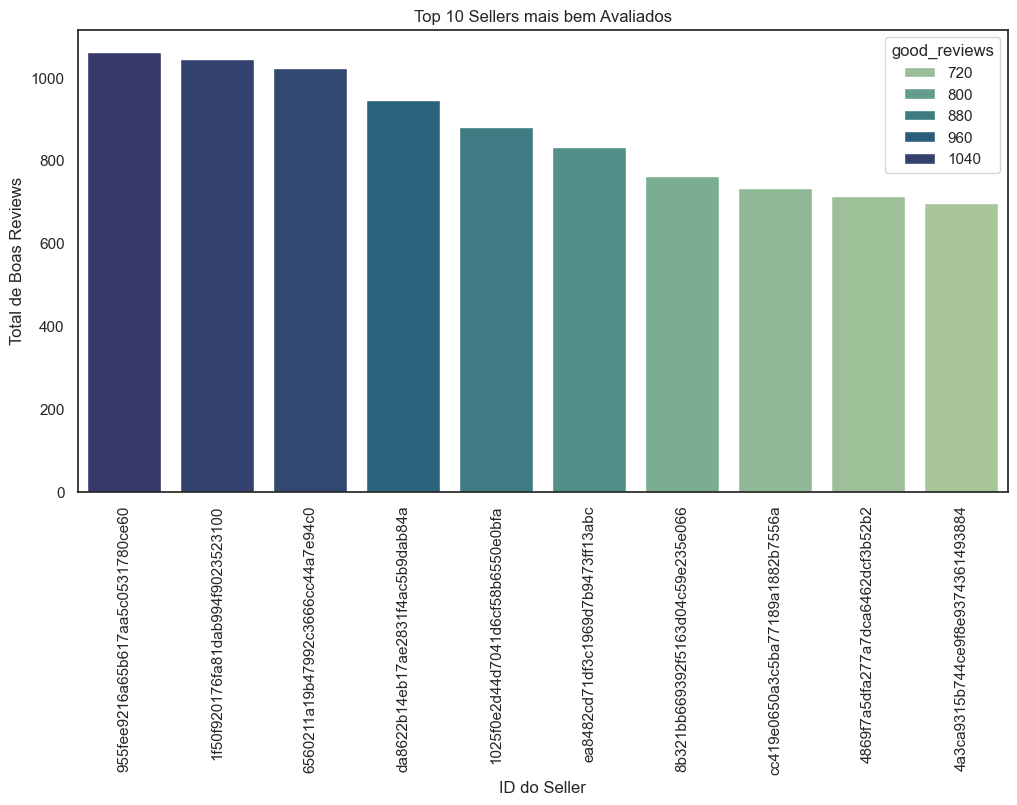

In [286]:
# Criando o gráfico
plt.figure(figsize=(12, 6))

best_sellers_graphic = sns.barplot(data=best_sellers_by_review, x='seller_id', y='good_reviews', palette='crest', hue='good_reviews')

best_sellers_graphic.set_title("Top 10 Sellers mais bem Avaliados")
best_sellers_graphic.set_ylabel("Total de Boas Reviews")
best_sellers_graphic.set_xlabel("ID do Seller")

plt.xticks(rotation=90)

## Top 10 piores sellers (com mais reviews negativas)?

### Buscando os piores sellers

Para identificar os piores sellers, priorizei a proporção de reviews negativas (review_score <= 2) em relação ao total de reviews (negative_ratio). Em caso de empate, considerei o menor número de avaliações totais como critério de desempate, penalizando sellers com menos relevância geral. Dessa forma um seller com 1000 reviews sendo 200 negativas (20%) não ficará na frente como pior seller do que um que tem 100 reviews e 50 negativas (50%).

In [288]:
# Encontrando a proporção de reviews
seller_reviews['negative_ratio'] = seller_reviews['bad_reviews'] / seller_reviews['total_reviews']

In [289]:
seller_reviews

,seller_id,total_reviews,good_reviews,bad_reviews,negative_ratio
0,0015a82c2db000af6aaaf3ae2ecb0532,1,0,1,1.000000
1,001cca7ae9ae17fb1caed9dfb1094831,77,56,13,0.168831
2,001e6ad469a905060d959994f1b41e4f,1,0,1,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,49,35,6,0.122449
4,003554e2dce176b5555353e4f3555ac8,1,1,0,0.000000
...,...,...,...,...,...
2583,ffc470761de7d0232558ba5e786e57b7,30,23,2,0.066667
2584,ffcfefa19b08742c5d315f2791395ee5,1,0,1,1.000000
2585,ffdd9f82b9a447f6f8d4b91554cc7dd3,16,12,3,0.187500
2586,ffeee66ac5d5a62fe688b9d26f83f534,13,11,2,0.153846


In [293]:
more_than_five_reviews = seller_reviews.loc[seller_reviews['total_reviews'] >= 5]


In [295]:
# Encontrando os 10 piores sellers
worst_sellers_by_review = more_than_five_reviews.sort_values(by=['negative_ratio', 'total_reviews'], ascending=[False, True]).head(10)
worst_sellers_by_review

,seller_id,total_reviews,good_reviews,bad_reviews,negative_ratio
10,010da0602d7774602cd1b3f5fb7b709e,5,0,5,1.000000
613,3bfad056cf05c00dabe2f895925d83b1,5,0,5,1.000000
1256,7994081388d55b9cf976c050653dd359,5,0,5,1.000000
1496,90d4125885ab6c86e8820a722be71974,5,0,5,1.000000
2553,fce62094ffe6a4009188ec44e681dfdd,5,0,5,1.000000
1808,b37c4c02bda3161a7546a4e6d222d5b2,6,0,6,1.000000
2392,ec2e006556300a79a5a91e4876ab3a56,8,0,8,1.000000
1443,8bd0e3abda539b9479c4b44a691be1ec,9,0,9,1.000000
699,4342d4b2ba6b161468c63a7e7cfce593,19,1,18,0.947368
1607,9cea4682e16655f7da87f406902e989e,7,1,6,0.857143


### Gráfico

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '010da0602d7774602cd1b3f5fb7b709e'),
  Text(1, 0, '3bfad056cf05c00dabe2f895925d83b1'),
  Text(2, 0, '7994081388d55b9cf976c050653dd359'),
  Text(3, 0, '90d4125885ab6c86e8820a722be71974'),
  Text(4, 0, 'fce62094ffe6a4009188ec44e681dfdd'),
  Text(5, 0, 'b37c4c02bda3161a7546a4e6d222d5b2'),
  Text(6, 0, 'ec2e006556300a79a5a91e4876ab3a56'),
  Text(7, 0, '8bd0e3abda539b9479c4b44a691be1ec'),
  Text(8, 0, '4342d4b2ba6b161468c63a7e7cfce593'),
  Text(9, 0, '9cea4682e16655f7da87f406902e989e')])

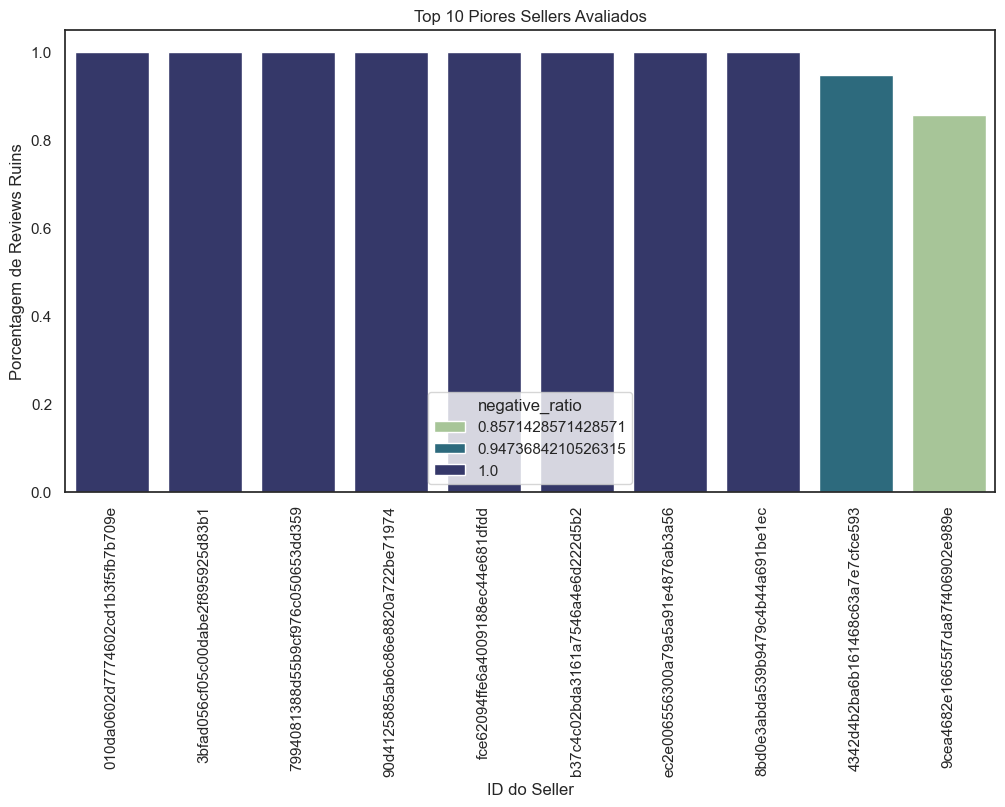

In [297]:
# Criando o gráfico
plt.figure(figsize=(12, 6))

worst_sellers_graphic = sns.barplot(data=worst_sellers_by_review, x='seller_id', y='negative_ratio', palette='crest', hue='negative_ratio')

worst_sellers_graphic.set_title("Top 10 Piores Sellers Avaliados")
worst_sellers_graphic.set_ylabel("Porcentagem de Reviews Ruins")
worst_sellers_graphic.set_xlabel("ID do Seller")

plt.xticks(rotation=90)

##  Existe relação entre a quantidade de vendas e a quantidade de reviews para os sellers? É possível identificar aumento ou queda na venda de um seller com base nas avaliações do que já foi vendido no passado?

### Junção dos dataframes

Primeiro, é necessário fazer a junção dos dataframes de orders, reviews e order_items.

In [303]:
filtered_data = pd.merge(filtered_items, reviews, on="order_id", how="inner")

In [304]:
# Fazendo agrupamento de todos os valores e quantidade de vendas de sellers
seller_data = filtered_data.groupby("seller_id").agg(total_sales=("order_id", "count"), total_reviews=("review_score", "count"),  
    review_score_mean=("review_score", "mean")).reset_index()

### Analise da Correlação 

Nessa seção vai ser analisada se existe correlação entre a quantidade de venda e a quantidade de reviews para os sellers.

In [306]:
correlation = seller_data["total_sales"].corr(seller_data["total_reviews"])
correlation

np.float64(1.0)

Dado os conceitos de estatística e correlação, quanto mais próxima de 1, significa que a correlação é **forte**.

### Analisando o impacto das reviews nas vendas

In [320]:
# Juntando os dataframes do intervalo de 12 meses e de reviews (fazendo novamente para não ter choque de dados)
sales_reviews = pd.merge(filtered_items, reviews, on="order_id", how="inner")

In [321]:
orders["order_purchase_month"] = pd.to_datetime(orders["order_purchase_timestamp"]).dt.to_period("M")
sales_reviews = pd.merge(sales_reviews, orders, on="order_id", how="inner")

In [322]:
# Calculando a taxa de variação mensal de vendas para cada seller (total de vendas e média)
seller_monthly_stats = sales_reviews.groupby(["seller_id", "order_purchase_month"]).agg(total_sales=("order_id", "count"),  
    avg_review_score=("review_score", "mean")).reset_index()

In [323]:
seller_monthly_stats

,seller_id,order_purchase_month,total_sales,avg_review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,1,1.000000
1,001cca7ae9ae17fb1caed9dfb1094831,2017-10,11,4.181818
2,001cca7ae9ae17fb1caed9dfb1094831,2017-11,24,4.083333
3,001cca7ae9ae17fb1caed9dfb1094831,2017-12,13,4.153846
4,001cca7ae9ae17fb1caed9dfb1094831,2018-01,8,4.625000
...,...,...,...,...
11225,fffd5413c0700ac820c7069d66d98c89,2018-04,4,3.750000
11226,fffd5413c0700ac820c7069d66d98c89,2018-05,8,3.625000
11227,fffd5413c0700ac820c7069d66d98c89,2018-06,2,5.000000
11228,fffd5413c0700ac820c7069d66d98c89,2018-07,2,5.000000


Agora é necessário verificar se teve queda ou aumento nas vendas

In [324]:
seller_monthly_stats["sales_change"] = seller_monthly_stats.groupby("seller_id")["total_sales"].pct_change()

In [326]:
seller_monthly_stats

,seller_id,order_purchase_month,total_sales,avg_review_score,sales_change
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10,1,1.000000,NaN
1,001cca7ae9ae17fb1caed9dfb1094831,2017-10,11,4.181818,NaN
2,001cca7ae9ae17fb1caed9dfb1094831,2017-11,24,4.083333,1.181818
3,001cca7ae9ae17fb1caed9dfb1094831,2017-12,13,4.153846,-0.458333
4,001cca7ae9ae17fb1caed9dfb1094831,2018-01,8,4.625000,-0.384615
...,...,...,...,...,...
11225,fffd5413c0700ac820c7069d66d98c89,2018-04,4,3.750000,0.000000
11226,fffd5413c0700ac820c7069d66d98c89,2018-05,8,3.625000,1.000000
11227,fffd5413c0700ac820c7069d66d98c89,2018-06,2,5.000000,-0.750000
11228,fffd5413c0700ac820c7069d66d98c89,2018-07,2,5.000000,0.000000


É possível ver alguns valores "estranhos" e nulos. Estarei tratando os nulos.

In [327]:
seller_monthly_stats = seller_monthly_stats.dropna(subset=["sales_change"])

In [328]:
seller_monthly_stats

,seller_id,order_purchase_month,total_sales,avg_review_score,sales_change
2,001cca7ae9ae17fb1caed9dfb1094831,2017-11,24,4.083333,1.181818
3,001cca7ae9ae17fb1caed9dfb1094831,2017-12,13,4.153846,-0.458333
4,001cca7ae9ae17fb1caed9dfb1094831,2018-01,8,4.625000,-0.384615
5,001cca7ae9ae17fb1caed9dfb1094831,2018-02,3,3.666667,-0.625000
6,001cca7ae9ae17fb1caed9dfb1094831,2018-03,10,2.900000,2.333333
...,...,...,...,...,...
11225,fffd5413c0700ac820c7069d66d98c89,2018-04,4,3.750000,0.000000
11226,fffd5413c0700ac820c7069d66d98c89,2018-05,8,3.625000,1.000000
11227,fffd5413c0700ac820c7069d66d98c89,2018-06,2,5.000000,-0.750000
11228,fffd5413c0700ac820c7069d66d98c89,2018-07,2,5.000000,0.000000


Agora, é só ver se existe alguma relação entre os fatores de review e quantidade de vendas.

In [329]:
correlation_sales_review = seller_monthly_stats["sales_change"].corr(seller_monthly_stats["avg_review_score"])

In [330]:
correlation_sales_review

np.float64(-0.020543593783785726)

A interpretação tirada é que a correlação de -0.02 sugere que as variações nas vendas **não são** fortemente influenciadas pela média das avaliações.

### Gráfico

Essa correlação pode ser vista mais facilmente utilizando um gráfico de dispersão.

Text(0.5, 0, 'Total de Vendas')

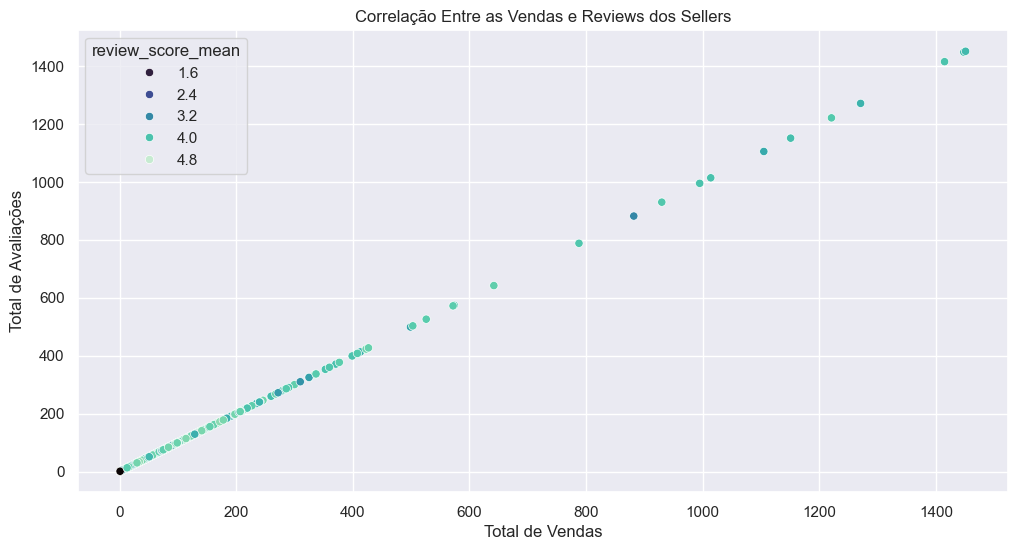

In [312]:
plt.figure(figsize=(12, 6))
sns.set_theme(style='darkgrid')
correlation_graphic = sns.scatterplot(data=seller_data, x='total_sales', y='total_reviews', hue='review_score_mean', palette='mako')

correlation_graphic.set_title("Correlação Entre as Vendas e Reviews dos Sellers")
correlation_graphic.set_ylabel("Total de Avaliações")
correlation_graphic.set_xlabel("Total de Vendas")


Analisando agora graficamente a correlação -0.02 obtida acima ao analisar se as reviews impactam na quantidade de vendas. 

Text(0, 0.5, 'Mudança nas Vendas %')

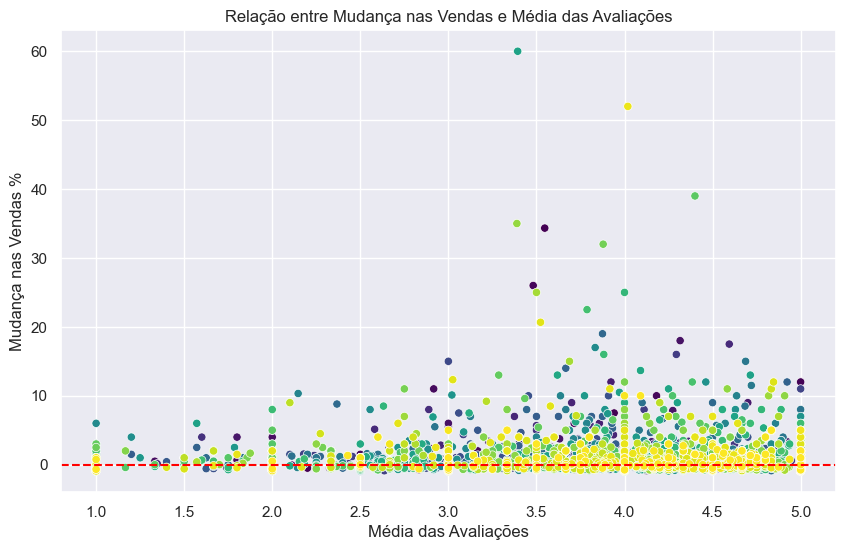

In [331]:
plt.figure(figsize=(10, 6))
correlation_sales_review_graphic = sns.scatterplot(data=seller_monthly_stats, x="avg_review_score", y="sales_change", hue="seller_id", palette="viridis", legend=False)

plt.axhline(0, color="red", linestyle="--")

correlation_sales_review_graphic.set_title("Relação entre Mudança nas Vendas e Média das Avaliações")
correlation_sales_review_graphic.set_xlabel("Média das Avaliações")
correlation_sales_review_graphic.set_ylabel("Mudança nas Vendas %")


## Tópico Livre: Top 5 Estados que mais venderam

### Juntando dataframes e Filtrando os 5 estados que mais venderam

Nesse caso, irei me basear nos sellers, uma vez que é mais prático para entender quais estados têm maior participação como hubs de vendas, independentemente de onde os clientes estão comprando.

In [332]:
# Agrupamento de orders e sellers para buscar o Estado
sales_by_state = filtered_items.merge(sellers, on="seller_id")


In [333]:
state_sales = sales_by_state.groupby("seller_state")["price"].sum().reset_index()

In [340]:
state_sales = state_sales.sort_values('price', ascending=False)

In [341]:
# Filtrando pelos 5 estados que mais venderam
best_five_states = state_sales.head(5)
best_five_states

,seller_state,price
20,SP,6082982.23
13,PR,903252.00
6,MG,649457.91
14,RJ,645453.69
18,SC,434771.81


### Gráfico

Text(0, 0.5, 'Receita Total')

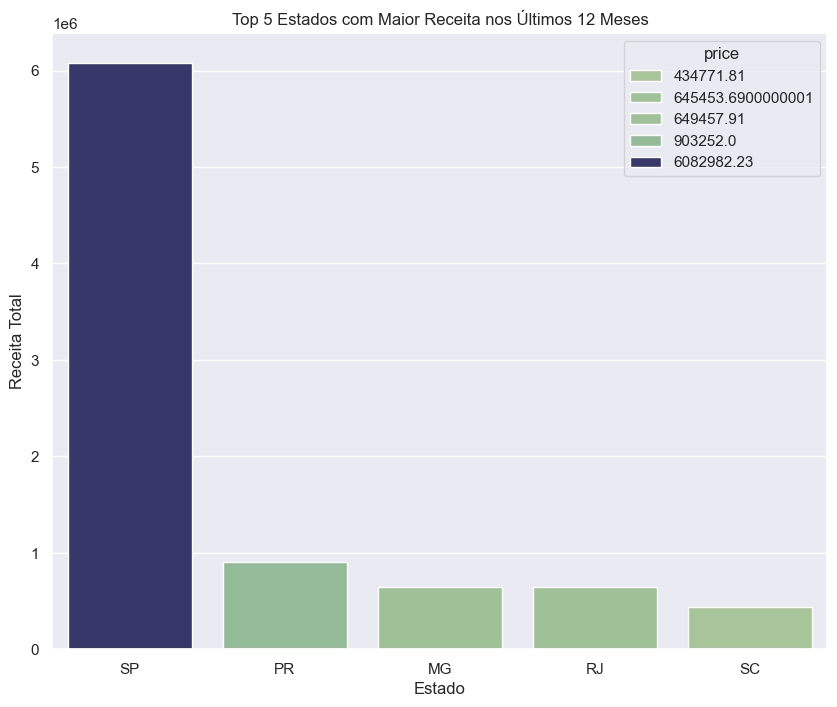

In [357]:
# Criando gráfico

plt.figure(figsize=(10, 8))

states_graphic = sns.barplot(data=best_five_states, x='seller_state', y='price', palette='crest', hue='price')

states_graphic.set_title("Top 5 Estados com Maior Receita nos Últimos 12 Meses")
states_graphic.set_xlabel("Estado")
states_graphic.set_ylabel("Receita Total")